In [1]:
from PIL import Image
from scipy import ndimage
from random import randint
import sys
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt

PATH = "data/"
PHOTOS_PATH = PATH + "photos/"

class dataGenerator(object):

    def __init__(self):
        self.IMAGE_SIZE=400
        self.tensorMap = torch.zeros([self.IMAGE_SIZE, self.IMAGE_SIZE])
    
    def drawBackground(self,imgMap):
        rgb = (randint(0,255),randint(0,255),randint(0,255))
        for i in range(self.IMAGE_SIZE):
            for j in range(self.IMAGE_SIZE):
                imgMap[i,j] = rgb
        
    def drawLine(self,imgMap,start,lenth):
        r = g = b = 128
        for i in range(start, start + lenth):
            for j in range(self.IMAGE_SIZE):
                imgMap[i,j] = (r,g,b)
                self.tensorMap[i,j] = 1

    def rotateImage(self, img, angle):
        return torchvision.transforms.functional.rotate(img,angle)
    
    def rotateTensor(self, tensor_, angle):
        tensor = tensor_.clone()
        tensor_image = torchvision.transforms.ToPILImage(mode='L')(tensor)
        tensor_image = torchvision.transforms.functional.rotate(tensor_image,angle)
        return torchvision.transforms.functional.to_tensor(tensor_image)
     
    def generateImage(self,lenth):
        img = Image.new('RGB',(self.IMAGE_SIZE,self.IMAGE_SIZE))
        imgMap = img.load()
        
        self.drawBackground(imgMap)
        
        factor = 0.45   # ft/px
        start = randint(10,self.IMAGE_SIZE - lenth)
        
        self.drawLine(imgMap,start,lenth)

        return img, self.tensorMap
    
    def showMaskOnImage(self, img, tensor):
        imgTemp = img.copy()
        imgMap = imgTemp.load()
        for i in range(0, self.IMAGE_SIZE):
            for j in range(0, self.IMAGE_SIZE):
                if tensor[i,j] == 1:
                    imgMap[i,j] = (255,0,0)
        return imgTemp

Picture  0


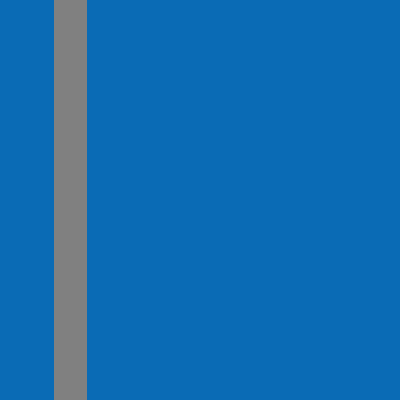

In [2]:
#import ImageGenerated_v2
#import pandas as pd
#from random import randint

factor = 0.45
num_of_images = 1

#imageGen = roadImage2()
imageGen = dataGenerator()

for i in range(0,num_of_images):
    if i % 10 == 0:
        print("Picture ",i)
    lenth = randint(17,35)
    img, tMap = imageGen.generateImage(lenth)
    
    
    FileName = str(i) + ".png"
    img.save(PHOTOS_PATH+ FileName,"PNG")
    

img
    
    
#     for i in range(30,180,30):
#         img2 = img.rotate(i)
#         img2.save(PHOTOS_PATH + FileName + "-" + str(i),"PNG")
#         img2 = imageGen.rotateImage(img,i)
#         img2.save("photos/" + FileName + "-" + str(i),"PNG")         
    
#     FileName = str(i) + ".png"
    
#     img.save("photos/" + FileName,"PNG")

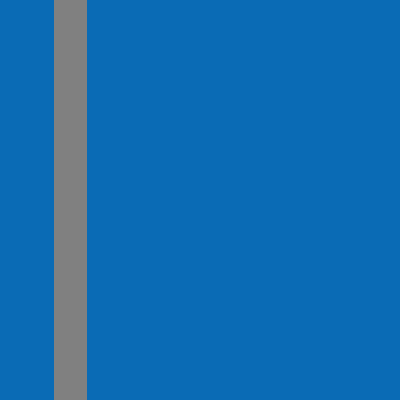

In [3]:
img

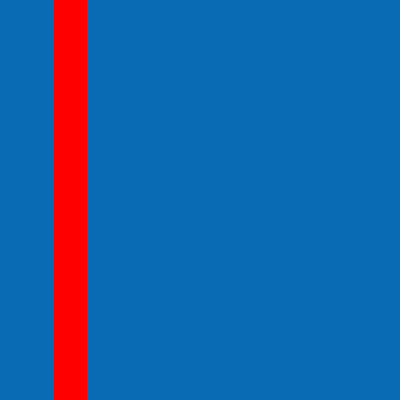

In [4]:
imgRed = imageGen.showMaskOnImage(img, tMap)
imgRed

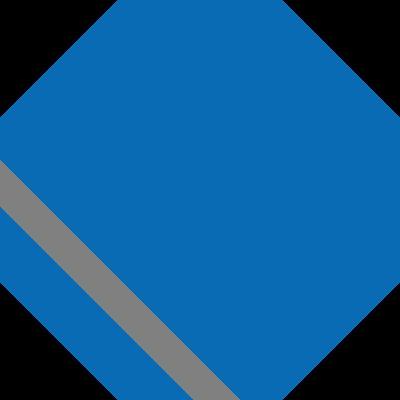

In [5]:
img2 = imageGen.rotateImage(img, 45)
img2

In [7]:
tMap2 = imageGen.rotateTensor(tMap, 45)
imgRed2 = imageGen.showMaskOnImage(img2, tMap2)
imgRed2

TypeError: pic should be Tensor or ndarray. Got <class 'torch.Tensor'>.

In [9]:
tMap.clone()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])